In [1]:
import pandas as pd
df_employee=pd.read_csv("empl.csv")
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [2]:
#lets chheck the null values in the dataset
df_employee.isnull().sum()
#based on below output we have sum null values which we need to impute

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [3]:
#Before imputing lets check the datatype
df_employee.dtypes
#datatypes are as expected

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

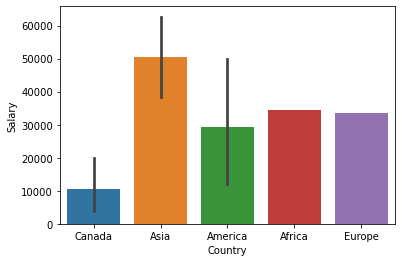

In [4]:
#lets do some graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt
#lets draw bar graph which shows average salary in each country
sns.barplot(x="Country",y="Salary",data=df_employee)
plt.show()

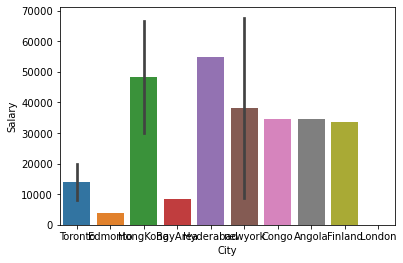

In [5]:
#let's plot the bar graph between city and salary
sns.barplot(x="City",y="Salary",data=df_employee)
plt.show()

In [6]:
#Now lets impute the null values in columns Age,City and Salary as found above
#For salary we will impute by groupping the cities
col_to_impute=["Age","City"]
for col in col_to_impute:
    if df_employee[col].dtype!="object":
        df_employee[col].fillna(df_employee[col].mean(),inplace=True)
    else:
        df_employee[col].fillna(df_employee[col].mode()[0],inplace=True)

In [7]:
#lets again check the null values
df_employee.isnull().sum()
#Only salary column is left which we will impute my taking mean of salaries belonging to same city

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [8]:
df_slry_grpby_city=df_employee.groupby(["City"]).agg({"Salary":"mean"})

In [9]:
for index in df_slry_grpby_city.index:
    df_employee.loc[df_employee["City"]==index,["Salary"]]=df_employee.loc[df_employee["City"]==index,["Salary"]].fillna(df_slry_grpby_city.loc[index])

In [10]:
#lets again check the null values
df_employee.isnull().sum()
#one value is left as single instance of that city was there and it was nan so for that we will direcly take mean of salary column

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     1
dtype: int64

In [11]:
#imputing last null value in salary column as mentioned above
df_employee["Salary"].fillna(df_employee["Salary"].mean(),inplace=True)

In [12]:
#again checking the null values
df_employee.isnull().sum()
#All null values we have imputed

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [13]:
df_employee

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.000000,Toronto,Canada,20000.000000
1,2,Lee,31.000000,Edmonto,Canada,3900.000000
2,3,Dave,34.000000,Toronto,Canada,8000.000000
3,4,Anik,26.000000,HongKong,Asia,66672.000000
4,5,kamal,30.000000,HongKong,America,39333.666667
5,6,Geet,32.421053,HongKong,Asia,30007.000000
6,7,Steven,43.000000,BayArea,America,8300.000000
7,8,Ram,38.000000,Hyderabad,Asia,54666.000000
8,9,hari,50.000000,newyork,America,67666.000000
9,11,yami,32.421053,newyork,America,8888.000000


In [14]:
#S.no and Name column will do nothing in predicting salary so lets drop the columns
df_employee.drop(columns=["SNo","Name"],inplace=True)

In [15]:
df_employee

,Age,City,Country,Salary
0,28.000000,Toronto,Canada,20000.000000
1,31.000000,Edmonto,Canada,3900.000000
2,34.000000,Toronto,Canada,8000.000000
3,26.000000,HongKong,Asia,66672.000000
4,30.000000,HongKong,America,39333.666667
5,32.421053,HongKong,Asia,30007.000000
6,43.000000,BayArea,America,8300.000000
7,38.000000,Hyderabad,Asia,54666.000000
8,50.000000,newyork,America,67666.000000
9,32.421053,newyork,America,8888.000000


In [16]:
import numpy as np
for col in df_employee.columns:
    if df_employee[col].dtype!="object":
        print("column name : "+col+" and skewness is : ",df_employee[col].skew())
        if df_employee[col].skew() > 0.55:
            df_employee[col]=np.log1p(df_employee[col])

column name : Age and skewness is :  1.034731645219974
column name : Salary and skewness is :  0.3169751648063996


In [17]:
#lets check skewness again
df_employee.skew()
#In above cell df_employee[col].dtype!="object" is not required as skew function returns skewness for numeric columns

Age       0.527799
Salary    0.316975
dtype: float64

In [18]:
df_employee

,Age,City,Country,Salary
0,3.367296,Toronto,Canada,20000.000000
1,3.465736,Edmonto,Canada,3900.000000
2,3.555348,Toronto,Canada,8000.000000
3,3.295837,HongKong,Asia,66672.000000
4,3.433987,HongKong,America,39333.666667
5,3.509186,HongKong,Asia,30007.000000
6,3.784190,BayArea,America,8300.000000
7,3.663562,Hyderabad,Asia,54666.000000
8,3.931826,newyork,America,67666.000000
9,3.509186,newyork,America,8888.000000


In [19]:
#lets use pd.get_dummies function to convert categorical columns numeric form which machine can uderstand
df_employee_final=pd.get_dummies(df_employee,drop_first=True)

In [20]:
#dataset which machine can understand
df_employee_final

,Age,Salary,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,3.367296,20000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
1,3.465736,3900.000000,0,0,1,0,0,0,0,0,0,0,0,1,0
2,3.555348,8000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3.295837,66672.000000,0,0,0,0,1,0,0,0,0,0,1,0,0
4,3.433987,39333.666667,0,0,0,0,1,0,0,0,0,1,0,0,0
5,3.509186,30007.000000,0,0,0,0,1,0,0,0,0,0,1,0,0
6,3.784190,8300.000000,1,0,0,0,0,0,0,0,0,1,0,0,0
7,3.663562,54666.000000,0,0,0,0,0,1,0,0,0,0,1,0,0
8,3.931826,67666.000000,0,0,0,0,0,0,0,0,1,1,0,0,0
9,3.509186,8888.000000,0,0,0,0,0,0,0,0,1,1,0,0,0


In [21]:
#Lets seprate input and output
df_x=df_employee_final.drop(columns=["Salary"])
y=df_employee_final[["Salary"]]

In [22]:
#Lets use decision tree regressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [23]:
regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,df_x,y)

r2 score corresponding to  42  is  -0.7511332891531153
r2 score corresponding to  43  is  -2.3043580617239914
r2 score corresponding to  44  is  -1.1424973023472225
r2 score corresponding to  45  is  -3.716456302922486
r2 score corresponding to  46  is  0.016074687415705502
r2 score corresponding to  47  is  -1.779917798271856
r2 score corresponding to  48  is  -1.6778290968646195
r2 score corresponding to  49  is  -0.23056650468440876
r2 score corresponding to  50  is  -0.8212699245236095
r2 score corresponding to  51  is  -0.7717126126962035
r2 score corresponding to  52  is  -0.9009781954263645
r2 score corresponding to  53  is  -1.5033455211125921
r2 score corresponding to  54  is  -0.3489135543294881
r2 score corresponding to  55  is  -1.146861921137274
r2 score corresponding to  56  is  -0.3983247568457533
r2 score corresponding to  57  is  -1.733517290624873
r2 score corresponding to  58  is  -2.6675365872696353
r2 score corresponding to  59  is  -0.39141724900439123
r2 score co

In [24]:
#lets use other model KNN regressor
#for using KNN regressor we need to find best value of k lets use grid search for that
#Before using grid search we need to scale our input set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [25]:
#using grid search for optimal value of k in knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,10)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 2}

In [26]:
knr=KNeighborsRegressor(n_neighbors=8)
final_r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  -0.04057187236402604
r2 score corresponding to  43  is  -0.17943949999116193
r2 score corresponding to  44  is  -0.11781813015596465
r2 score corresponding to  45  is  -2.3461890710396105
r2 score corresponding to  46  is  -0.0975123393807118
r2 score corresponding to  47  is  -0.1915202405747527
r2 score corresponding to  48  is  -0.12981544528194489
r2 score corresponding to  49  is  -0.09727187591028041
r2 score corresponding to  50  is  -0.05253118363895859
r2 score corresponding to  51  is  -0.5220120422315564
r2 score corresponding to  52  is  -0.2798253573616152
r2 score corresponding to  53  is  0.037826547531370824
r2 score corresponding to  54  is  -0.39421336841413646
r2 score corresponding to  55  is  0.0975158833631925
r2 score corresponding to  56  is  -0.15103046376523954
r2 score corresponding to  57  is  -0.4554088212689664
r2 score corresponding to  58  is  -1.1870083807787033
r2 score corresponding to  59  is  -0.10315058058506121
r

In [27]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,df_x,y)

r2 score corresponding to  42  is  -1.0955297210365162
r2 score corresponding to  43  is  -2.221945024769432
r2 score corresponding to  44  is  -0.2841476705072541
r2 score corresponding to  45  is  -5.1229248061327155
r2 score corresponding to  46  is  -0.2321260410254813
r2 score corresponding to  47  is  -2.024362239909437
r2 score corresponding to  48  is  0.27913113337922535
r2 score corresponding to  49  is  0.00032297639380252097
r2 score corresponding to  50  is  0.1746884596699676
r2 score corresponding to  51  is  0.015676455845043624
r2 score corresponding to  52  is  -0.4165391465076236
r2 score corresponding to  53  is  -1.874446113761064
r2 score corresponding to  54  is  -0.4290606962819181
r2 score corresponding to  55  is  -2.2152035625827886
r2 score corresponding to  56  is  -1.191996591476987
r2 score corresponding to  57  is  -1.6705705037174
r2 score corresponding to  58  is  -3.946434822537497
r2 score corresponding to  59  is  -0.4101523322830105
r2 score corres

In [28]:
x

,Age,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,-0.673825,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,3.162278,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
1,-0.140407,-0.218218,-0.218218,3.162278,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
2,0.345174,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,3.162278,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
3,-1.061039,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
4,-0.312444,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,1.322876,-0.612372,-0.471405,-0.316228
5,0.095036,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
6,1.585198,4.582576,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,-0.471405,1.322876,-0.612372,-0.471405,-0.316228
7,0.931551,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,3.162278,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
8,2.385193,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,2.121320,1.322876,-0.612372,-0.471405,-0.316228
9,0.095036,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,2.121320,1.322876,-0.612372,-0.471405,-0.316228
